In [1]:
import numpy as np

df_training = open("mnist_train.csv")
df_testing = open("mnist_test.csv")

# ignore column names lines
df_testing.readline()
df_training.readline()

buffer = [[float(x) for x in line.split(',')] for line in df_training.readlines()]

training_labels = np.array([data[0] for data in buffer], dtype=np.int_)
training_features = np.array([data[1:] for data in buffer], dtype=np.double)
training_features /= 255

buffer = [[float(x) for x in line.split(',')] for line in df_testing.readlines()]

testing_labels = np.array([data[0] for data in buffer], dtype=np.double)
testing_features = np.array([data[1:] for data in buffer], dtype=np.double)
testing_features /= 255


In [2]:
class LogisticRegression:

    """ Forward Propagation """
    def forward_prop(self, x, w):
        return self.activation(np.matmul(x, w))
    
    """ sigmoid activation function"""
    def activation(self, x):
        return 1 / (1 + np.exp(-x))
    
    """ MSE loss function (guess & label are np.arrays)"""
    def MSE_loss(self, guess, label, w):
        return (np.sum((np.square(np.subtract(guess, label)) / 2)) / len(label)) + np.sum(np.square(w))

    """ Returns the error rate, expressed as a percentage, of the given dataset """
    def error_rate(self, features, labels, w):

        if len(features) != len(labels):
            print("invalid data")
            return

        errors = 0.0
        y_hat = self.forward_prop(features, w)

        for i in range(len(labels)):
            guess = round(y_hat[i])
            if guess != labels[i]:
                errors += 1

        return errors / len(labels)

    
    #   Gradient Decent Implementation
    #   Features and Labels should be from the training set
    def fit(self, training_features, training_labels, max_epochs=100, learning_rate=.01, gamma=1):

        if len(training_features) != len(training_labels):
            print("invalid data")
            return
        
        # initialize weights
        d = len(training_features[0])
        w = np.random.normal(0.5, 0.2, size=(d,))

        for i in range(max_epochs):
            
            # every 10 epochs
            if i % 10 == 0:
                y = self.forward_prop(training_features, w)
                loss = self.MSE_loss(y, training_labels, w)
                print("Epoch:", i, "\tLoss:", loss)

                # learning rate step decay
                learning_rate *= .5

            # calculate prediction vector for entire dataset
            y_hat = self.forward_prop(training_features, w)

            # compute gradient with added weight constraints
            gradient = np.matmul(np.subtract(y_hat, training_labels), training_features) + gamma * w

            # weight update
            w -= learning_rate * gradient

        return w


In [3]:
model = LogisticRegression()

for d in range(10):
    new_testing_labels = np.array([int(x == d) for x in testing_labels], dtype=np.int_)
    new_training_labels = np.array([int(x == d) for x in training_labels], dtype=np.int_)

    weights = model.fit(training_features, new_training_labels, max_epochs=100, learning_rate=0.01, gamma=1)
    print("Digit:", d, "\tErorr Rate:", model.error_rate(testing_features, new_testing_labels, weights))
    print('\n')

    # save weight to file
    filename = "weights/w" + str(d) + "_result.bin"
    weights.tofile(filename)

Epoch: 0 	Loss: 236.3748812741647


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_62420\2430852111.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 10 	Loss: 806909.0566229271
Epoch: 20 	Loss: 717788.0045361156
Epoch: 30 	Loss: 679095.2804892708
Epoch: 40 	Loss: 660970.1714754138
Epoch: 50 	Loss: 652188.8249426306
Epoch: 60 	Loss: 647865.5887622961
Epoch: 70 	Loss: 645720.5126248344
Epoch: 80 	Loss: 644652.0639268389
Epoch: 90 	Loss: 644118.8577963324
Digit: 0 	Erorr Rate: 0.0212


Epoch: 0 	Loss: 223.14702870457913
Epoch: 10 	Loss: 1215222.5348936438
Epoch: 20 	Loss: 1120086.0820548558
Epoch: 30 	Loss: 1077408.941716815
Epoch: 40 	Loss: 1056833.036410005
Epoch: 50 	Loss: 1046719.3468043816
Epoch: 60 	Loss: 1041704.7129942667
Epoch: 70 	Loss: 1039207.7989191081
Epoch: 80 	Loss: 1037961.9190982104
Epoch: 90 	Loss: 1037339.6216912925
Digit: 1 	Erorr Rate: 0.0141


Epoch: 0 	Loss: 226.36261461164216
Epoch: 10 	Loss: 497794.86253175605
Epoch: 20 	Loss: 426357.76726911584
Epoch: 30 	Loss: 396548.68914781837
Epoch: 40 	Loss: 382707.9696562288
Epoch: 50 	Loss: 376021.2566494093
Epoch: 60 	Loss: 372732.84450003825
Epoch: 70 	Loss: 

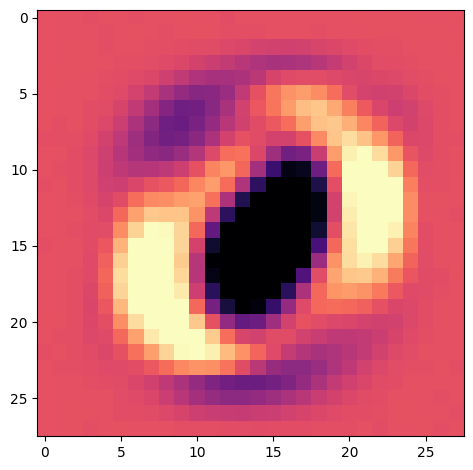

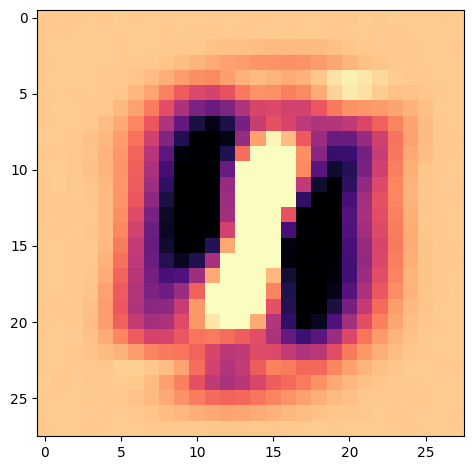

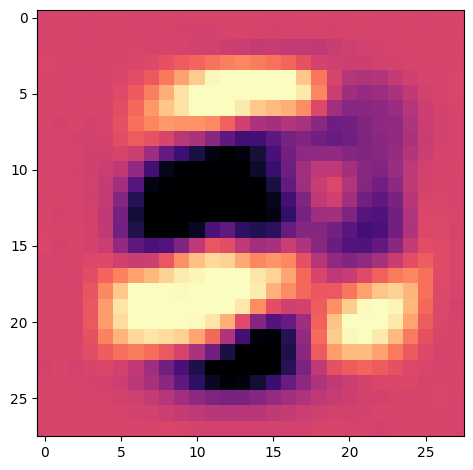

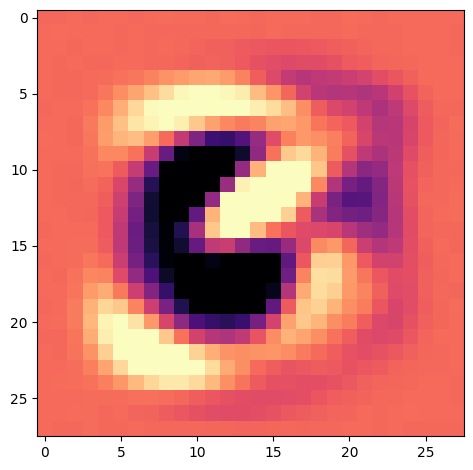

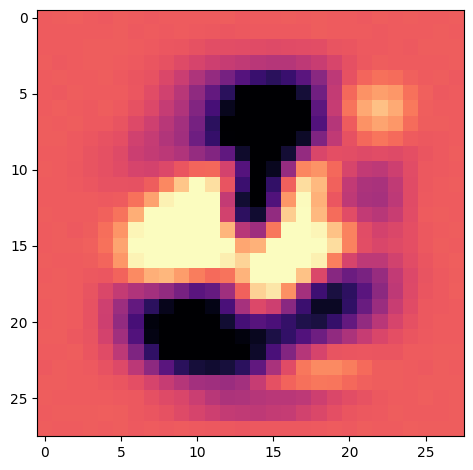

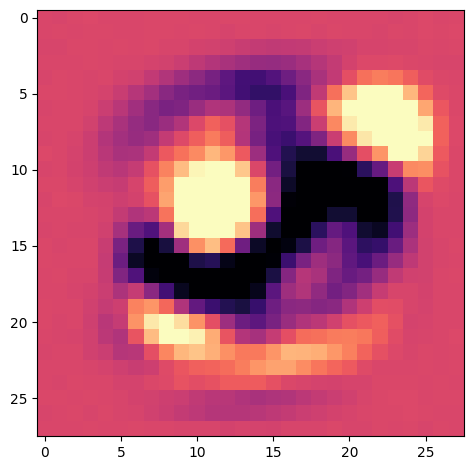

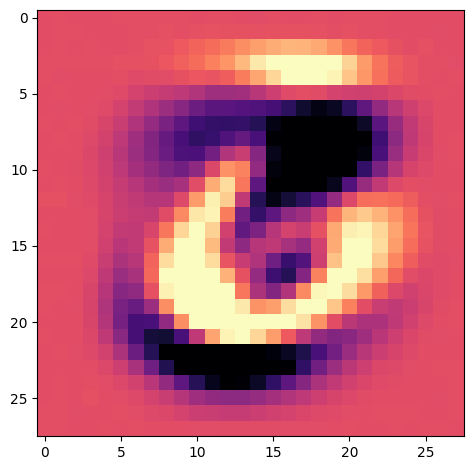

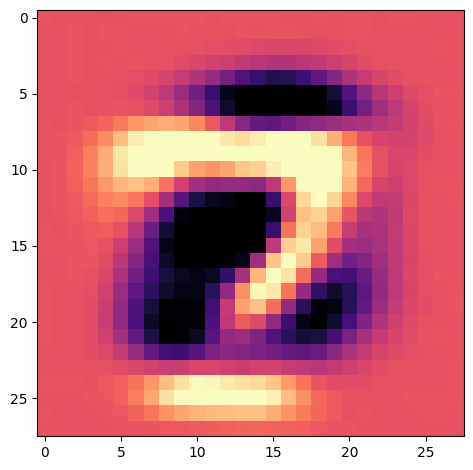

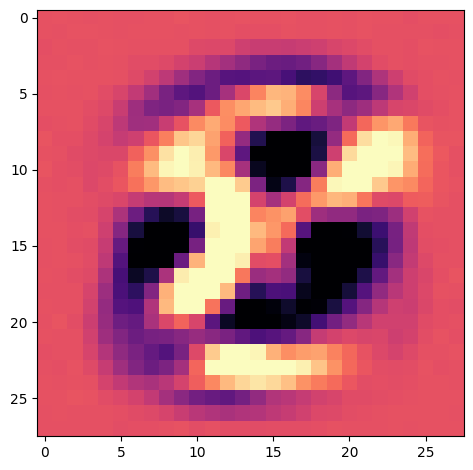

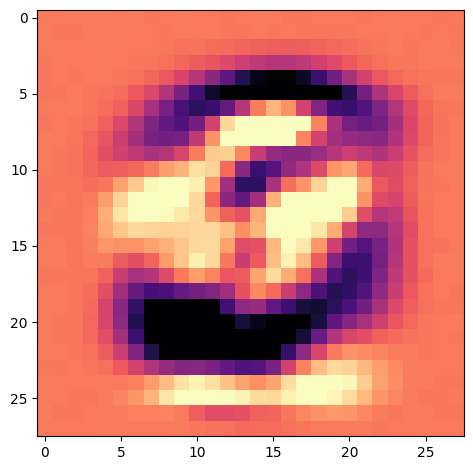

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#view results

for d in range(10):

    weights = np.fromfile("weights/w" + str(d) + "_result.bin")
    weights = np.reshape(weights, (28, 28))

    min = np.percentile(weights, 5)
    max = np.percentile(weights, 95)

    norm = mpl.colors.Normalize(vmin = min, vmax = max)

    fig, ax = plt.subplots()
    im = ax.imshow(weights, norm=norm, cmap='magma')

    plt.tight_layout()
    plt.show()